In [44]:
import pandas as pd
import numpy as np 
import warnings
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

from wordcloud import WordCloud
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from numpy import mean,std, absolute
from sklearn.model_selection import cross_val_score, RepeatedKFold

sns.set_style('darkgrid')
pd.set_option('display.max_columns', None)
warnings.filterwarnings('ignore')

In [2]:
''' reading dataset '''
df = pd.read_csv('startup_funding.csv')

In [3]:
''' displaying first 5 rows'''
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [4]:
''' shape of data '''
df.shape

(3044, 10)

In [5]:
''' checking null values in dataset '''
df.isnull().sum()

Sr No                   0
Date dd/mm/yyyy         0
Startup Name            0
Industry Vertical     171
SubVertical           936
City  Location        180
Investors Name         24
InvestmentnType         4
Amount in USD         960
Remarks              2625
dtype: int64

In [6]:
''' checking info of data '''
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [7]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [8]:
''' removing date column from data '''
df = df.drop(['Date dd/mm/yyyy'], axis=1)

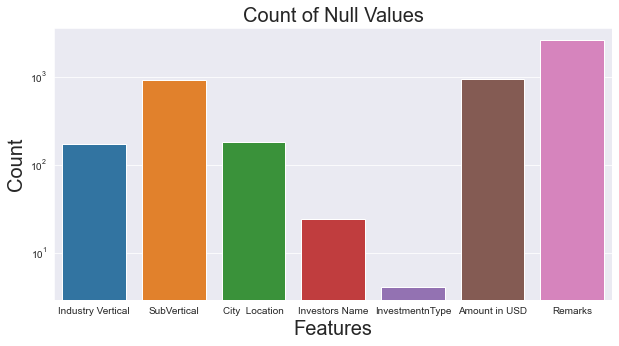

In [9]:
''' barplot of features that contains null values '''
null_label = df.isnull().sum()[2:]
plt.figure(figsize=(10, 5))
sns.barplot(null_label.index, null_label, log=True)
plt.title("Count of Null Values", fontsize=20)
plt.xlabel('Features', fontsize=20)
plt.ylabel('Count', fontsize=20);

In [10]:
''' Filling 'Investors Name' '''
df['Investors Name'] = df['Investors Name'].fillna("Unknown")

''' Filling Industry Vertical Value '''
df['Industry Vertical'] = df['Industry Vertical'].fillna(method='ffill')

''' Filling SubVertical Value with mode of Subvertical column '''
df['SubVertical'] = df['SubVertical'].fillna(df['SubVertical'].mode()[0])

''' Filling City Location Value '''
df['City  Location'] = df['City  Location'].fillna(df['City  Location'].value_counts()[0])

In [11]:
df.head()

,Sr No,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [12]:
''' Removing those rows whose column value are: undisclosed, Undisclosed, unknown '''
df.drop(df.loc[(df['Amount in USD'] == 'undisclosed') | (df['Amount in USD'] == 'Undisclosed') | 
                (df['Amount in USD'].isnull()) | (df['Amount in USD'] == 'unknown')].index,inplace=True)

In [13]:
''' renaming rows '''
df["Amount in USD"] = df["Amount in USD"].apply(lambda x:(str(x).replace('undisclosed','').replace(",","").replace('Undisclosed','')
                                                              .replace("+","").replace(r'N/A', "others").replace(r'n/a',"others")))

In [14]:
df['Amount in USD'] = df['Amount in USD'].str.replace(r"\\+",'')
df['Amount in USD'] = df['Amount in USD'].str.replace("xc2xa0",'')

In [15]:
''' filling remarks '''
df['Remarks'].fillna('None', inplace=True)

In [16]:
''' Taking only those rows whose column value other than others '''
df = df[df['Amount in USD']!='others']

''' converting Amount in USD into numeric '''
df['Amount in USD'] = pd.to_numeric(df['Amount in USD']) 

In [17]:
''' replacing  \\ from City Location '''
df['City  Location'] = df['City  Location'].str.replace(r'\\+', '')
df['City  Location'] = df['City  Location'].str.replace("xc2xa0", "")

In [18]:
df['City  Location'].dtype

dtype('O')

In [19]:
''' taking first city '''
def remove_ex(x):
    return str(x).split('/')[0].strip()
df['City  Location']=df['City  Location'].map(remove_ex)

''' InvestmentnType '''
def remove_ex_inves(x):
    return str(x).split('/')[0].strip()
df['InvestmentnType'] = df['InvestmentnType'].map(remove_ex_inves)

In [20]:
''' creating new list '''
startup_10 = []

for s in df['Startup Name'].unique():
    ''' get the dataframe for each startup '''
    df_ = df[df['Startup Name'] == s]    
    
    ''' sum total funding of startup''' 
    sm = np.sum(df_['Amount in USD'])         
    
    startup_10.append([s, sm])

In [21]:
df_startup= pd.DataFrame(startup_10, columns=['startup','Revenue" in million"'])

'''converting the list to dataframe and sort them by the fundin amount'''
df_startup.sort_values(by='Revenue" in million"',ascending=False,inplace=True)

In [22]:
df_startup

,startup,"Revenue"" in million"""
482,Flipkart,4.059700e+09
55,Rapido Bike Taxi,3.900000e+09
29,Paytm,3.148950e+09
533,Ola,9.845000e+08
31,Udaan,8.700000e+08
...,...,...
1691,Enabli,1.600000e+04
1690,Yo Grad,1.600000e+04
1689,Play your sport,1.600000e+04
1688,Hostel Dunia,1.600000e+04


In [23]:
df_startup = df_startup.rename(columns={'Revenue" in million"': 'revenue'})

In [24]:
''' diving amount by 1M to show data in term of Millions '''
df_startup['revenue'] /= 1000000
rev = df_startup.head(10)

In [25]:
label = df_startup.startup.head(10)

In [26]:
label

482             Flipkart
55      Rapido Bike Taxi
29                 Paytm
533                  Ola
31                 Udaan
1489        Flipkart.com
1141            Snapdeal
59              Ola Cabs
168           True North
289            BigBasket
Name: startup, dtype: object

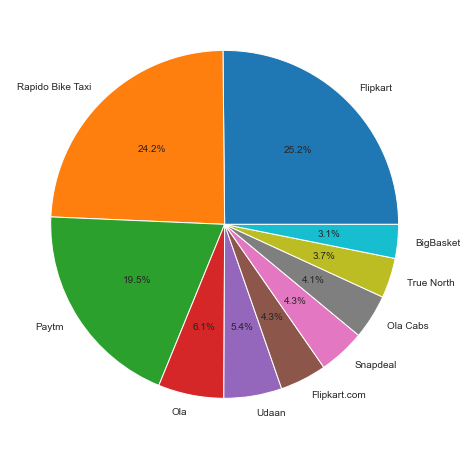

In [27]:
''' Pie chart representationn of revenue '''
plt.figure(figsize =(8, 8))
explode = (0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,0.0,0.0,0.0)
plt.pie(rev.revenue, labels=label, explode=explode,autopct='%1.1f%%');

In [28]:
''' investor func to name undisclosed investors to others '''
def investor(y):
    ''' strip() removes unwanted spaces or anything at start and at the end'''
    y = y.strip()
    
    if y == 'undisclosed' or y == 'undisclosed investors' or y == 'undisclosed investor':
        return 'others'
    else:
        return y
df["Investors Name"]=df["Investors Name"].apply(investor)

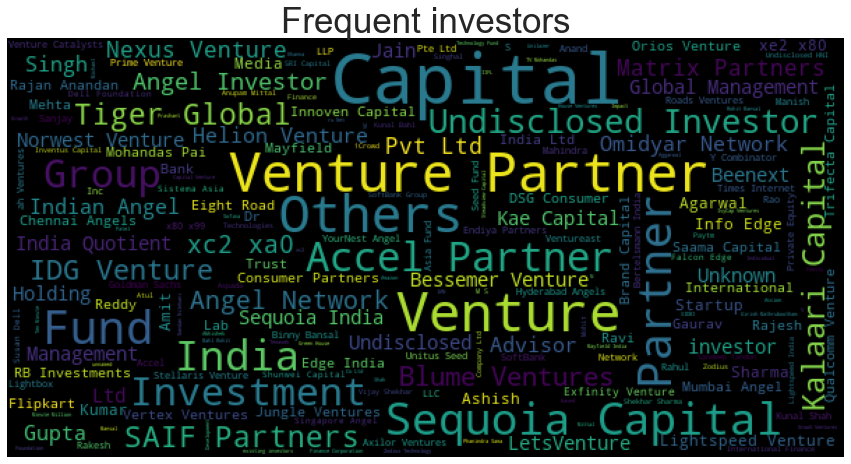

In [29]:
n = df[df['Investors Name'] != 'others']["Investors Name"]

''' wordcount representation '''
word_cloud = WordCloud(max_font_size=50, width=600, height=300, background_color='black').generate(' '.join(n))
plt.figure(figsize=(15,8))
plt.imshow(word_cloud)
plt.title("Frequent investors", fontsize=35)
plt.axis("off")
plt.show()

In [30]:
''' aggregate the revenue as per the startup name '''
for i, r in df.iterrows():
    df.at[i,'Location'] = list(set(df[df['Startup Name'] == r['Startup Name']]['City  Location'].values))
    df.at[i,'Revenue'] = float(np.sum(df[df['Startup Name'] == r['Startup Name']]['Amount in USD'].values))

In [31]:
'''remove the duplicate startups rows'''
df.drop_duplicates(subset='Startup Name',keep=False,ignore_index=True,inplace=True)

In [32]:
'''convert location to the one-hot  encoding'''
mul_lbl_bin = MultiLabelBinarizer()
result = pd.DataFrame(mul_lbl_bin.fit_transform(df['Location']), columns=mul_lbl_bin.classes_, index=df['Location'].index)

In [33]:
''' concating data '''
df=pd.concat([df,result],axis=1)

In [34]:
df.head()

,Sr No,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Location,Revenue,Ahemadabad,Ahmedabad,Amritsar,B,Bangalore,Belgaum,Bengaluru,Bengaluru and Gurugram,Bhopal,Bhubneswar,Boston,Burnsville,California,Chandigarh,Chembur,Chennai,Coimbatore,Dallas,Delhi,Delhi & Cambridge,Faridabad,Gaya,Goa,Gurgaon,Gurugram,Gwalior,Haryana,Hyderabad,India,Indore,Jaipur,Jodhpur,Kanpur,Karnataka,Kerala,Kolkata,Kormangala,Lucknow,Menlo Park,Missourie,Mumbai,Nagpur,Nairobi,New Delhi,New York,Noida,Panaji,Pune,Rourkela,SFO,San Francisco,"San Jose,",Santa Monica,Singapore,Surat,Trivandrum,Tulangan,US,USA,Udaipur,Udupi,Vadodara,Varanasi,a,e,g,l,n,nan,r,u
0,1,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,None,Bengaluru,200000000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1
1,3,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,None,[Bengaluru],18358860.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,None,[New Delhi],3000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,None,[Mumbai],1800000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000.0,None,[Chennai],9000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [35]:
''' tfidf '''
tfidf = TfidfVectorizer(stop_words='english',analyzer='word',max_features=500)
res = tfidf.fit_transform(df['SubVertical'])

In [36]:
df.reset_index(drop=True,inplace=True) 

In [37]:
df.head()

,Sr No,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks,Location,Revenue,Ahemadabad,Ahmedabad,Amritsar,B,Bangalore,Belgaum,Bengaluru,Bengaluru and Gurugram,Bhopal,Bhubneswar,Boston,Burnsville,California,Chandigarh,Chembur,Chennai,Coimbatore,Dallas,Delhi,Delhi & Cambridge,Faridabad,Gaya,Goa,Gurgaon,Gurugram,Gwalior,Haryana,Hyderabad,India,Indore,Jaipur,Jodhpur,Kanpur,Karnataka,Kerala,Kolkata,Kormangala,Lucknow,Menlo Park,Missourie,Mumbai,Nagpur,Nairobi,New Delhi,New York,Noida,Panaji,Pune,Rourkela,SFO,San Francisco,"San Jose,",Santa Monica,Singapore,Surat,Trivandrum,Tulangan,US,USA,Udaipur,Udupi,Vadodara,Varanasi,a,e,g,l,n,nan,r,u
0,1,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,None,Bengaluru,200000000.0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1
1,3,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,None,[Bengaluru],18358860.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,None,[New Delhi],3000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,None,[Mumbai],1800000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,Pando,Logistics,"Open-market, freight management platform",Chennai,Chiratae Ventures,Series A,9000000.0,None,[Chennai],9000000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
''' converting vector list to array '''
res = res.toarray()   
df_new = pd.DataFrame(res)

'''concating with original '''
df = pd.concat([df,df_new],axis=1)

In [39]:
''' preprocessing '''
lbl_enc = LabelEncoder()

df['Startup Name'] = lbl_enc.fit_transform(df['Startup Name'])
df['Industry Vertical'] = lbl_enc.fit_transform(df['Industry Vertical'])
df['InvestmentnType'] = lbl_enc.fit_transform(df['InvestmentnType'])

''' dropping some columns '''
df.drop(['Industry Vertical', 'SubVertical', 'Investors Name', 'Remarks', 'Amount in USD',
         'Location', 'City  Location'],inplace=True,axis=1)

df['Revenue'] /= 1000000

In [43]:
''' Ridge Regression '''
ridge_model= Ridge(normalize=True,alpha=0.1) 
cv = RepeatedKFold(n_splits=20, n_repeats=3, random_state=32)  
result = cross_val_score(ridge_model, df.loc[:, df.columns != 'Revenue'],df['Revenue'], scoring='neg_median_absolute_error', 
                         cv=cv, n_jobs=-1)

result = absolute(result)
print('Mean MAE: %.3f (%.3f)' % (mean(result), std(result)))

Mean MAE: 13.525 (2.207)


In [45]:
''' Lasso Regression '''
lasso_model = Lasso(alpha=0.1,normalize=True)
cv = RepeatedKFold(n_splits=20, n_repeats=3, random_state=32)
result = cross_val_score(lasso_model, df.loc[:, df.columns != 'Revenue'],df['Revenue'], scoring='neg_median_absolute_error', 
                         cv=cv, n_jobs=-1)

result = absolute(result)
print('Mean MAE: %.3f (%.3f)' % (mean(result), std(result)))

Mean MAE: 7.987 (0.382)
